### GROUP PROJECT

Topic: Students performance in exams


Group members:

1. Chua Hun Ho A18CS0050
2. Jasmine Chan Yuan Qi A18CS0083
3. Khoo Jie Xuan A18CS0091

### Data preparation and cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
record = pd.read_csv('StudentsPerformance.csv')
record.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
# Change column name
record = record.rename(
    columns =
    {   "gender":"Gender",
        "race/ethnicity":"Race",
        "parental level of education":"Parental_education_level",
        "lunch":"Lunch",
        "test preparation course":"Preparation_Course",
        "math score":"Math_score",
        "reading score":"Reading_score",
        "writing score":"Writing_score"}).copy()
record.head()

,Gender,Race,Parental_education_level,Lunch,Preparation_Course,Math_score,Reading_score,Writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Replace value of gender and race
record["Gender"].replace({"female":"F","male":"M"},inplace=True)
record["Race"].replace({"group A":"A","group B":"B","group C":"C","group D":"D","group E":"E"},inplace=True)
record.head()

,Gender,Race,Parental_education_level,Lunch,Preparation_Course,Math_score,Reading_score,Writing_score
0,F,B,bachelor's degree,standard,none,72,72,74
1,F,C,some college,standard,completed,69,90,88
2,F,B,master's degree,standard,none,90,95,93
3,M,A,associate's degree,free/reduced,none,47,57,44
4,M,C,some college,standard,none,76,78,75


In [5]:
#List value of each column
for i in list(record.columns[:5]):
    print("{} Column \n".format(i),record[i].value_counts(),end="\n\n",sep="")

Gender Column 
F    518
M    482
Name: Gender, dtype: int64

Race Column 
C    319
D    262
B    190
E    140
A     89
Name: Race, dtype: int64

Parental_education_level Column 
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_education_level, dtype: int64

Lunch Column 
standard        645
free/reduced    355
Name: Lunch, dtype: int64

Preparation_Course Column 
none         642
completed    358
Name: Preparation_Course, dtype: int64



In [6]:
#Drop if any empty row exists
df = record.dropna()
df

,Gender,Race,Parental_education_level,Lunch,Preparation_Course,Math_score,Reading_score,Writing_score
0,F,B,bachelor's degree,standard,none,72,72,74
1,F,C,some college,standard,completed,69,90,88
2,F,B,master's degree,standard,none,90,95,93
3,M,A,associate's degree,free/reduced,none,47,57,44
4,M,C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,F,E,master's degree,standard,completed,88,99,95
996,M,C,high school,free/reduced,none,62,55,55
997,F,C,high school,free/reduced,completed,59,71,65
998,F,D,some college,standard,completed,68,78,77


In [7]:
#Check for null/empty row
record.isnull().sum()

Gender                      0
Race                        0
Parental_education_level    0
Lunch                       0
Preparation_Course          0
Math_score                  0
Reading_score               0
Writing_score               0
dtype: int64

In [8]:
#Add column for average score of three subjects
df['Average_score'] = df[['Math_score', 'Reading_score', 'Writing_score']].mean(axis=1)
df.head()

,Gender,Race,Parental_education_level,Lunch,Preparation_Course,Math_score,Reading_score,Writing_score,Average_score
0,F,B,bachelor's degree,standard,none,72,72,74,72.666667
1,F,C,some college,standard,completed,69,90,88,82.333333
2,F,B,master's degree,standard,none,90,95,93,92.666667
3,M,A,associate's degree,free/reduced,none,47,57,44,49.333333
4,M,C,some college,standard,none,76,78,75,76.333333


### Data Aggregation and Group Operations

Score list are grouped by each factor

In [9]:
# Factor: Gender
Score_list = ['Math_score','Reading_score','Writing_score','Average_score']

factor_gender = df[Score_list].groupby(df['Gender']).mean()
factor_gender

,Math_score,Reading_score,Writing_score,Average_score
Gender,,,,
F,63.633205,72.608108,72.467181,69.569498
M,68.728216,65.473029,63.311203,65.837483


In [10]:
# Factor: Race
factor_race = df[Score_list].groupby(df['Race']).mean()
factor_race

,Math_score,Reading_score,Writing_score,Average_score
Race,,,,
A,61.629213,64.674157,62.674157,62.992509
B,63.452632,67.352632,65.600000,65.468421
C,64.463950,69.103448,67.827586,67.131661
D,67.362595,70.030534,70.145038,69.179389
E,73.821429,73.028571,71.407143,72.752381


In [11]:
# Factor: Parental_education_level
factor_edu = df[Score_list].groupby(df['Parental_education_level']).mean()
factor_edu

,Math_score,Reading_score,Writing_score,Average_score
Parental_education_level,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [12]:
# Factor: Lunch
factor_lunch = df[Score_list].groupby(df['Lunch']).mean()
factor_lunch

,Math_score,Reading_score,Writing_score,Average_score
Lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In [13]:
# Factor: Preparation_Course
factor_pre = df[Score_list].groupby(df['Preparation_Course']).mean()
factor_pre

,Math_score,Reading_score,Writing_score,Average_score
Preparation_Course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


### Data visualization

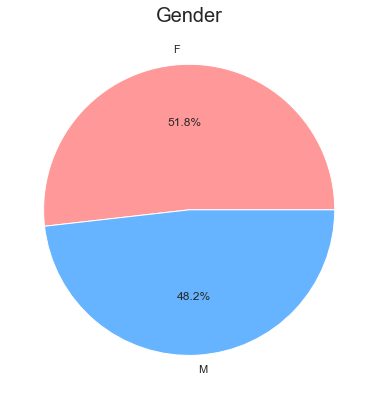

In [41]:
#Plotting pie chart of gender
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ff99ff','#ffb266']

plt.figure(figsize=(30,10))
plt.subplot(141)
plt.axis('off')
plt.title('Gender',fontsize = 20)
df['Gender'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors)
plt.show()

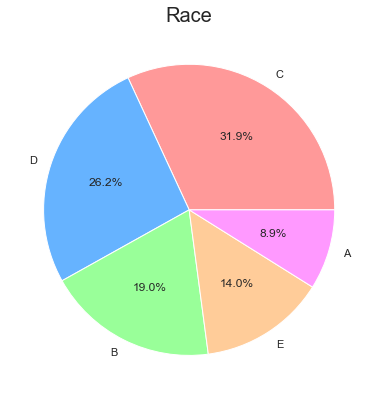

In [38]:
#Plotting pie chart of race
plt.figure(figsize=(30,10))
plt.subplot(142)
plt.axis('off')
plt.title('Race',fontsize = 20)
df['Race'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors)
plt.show()

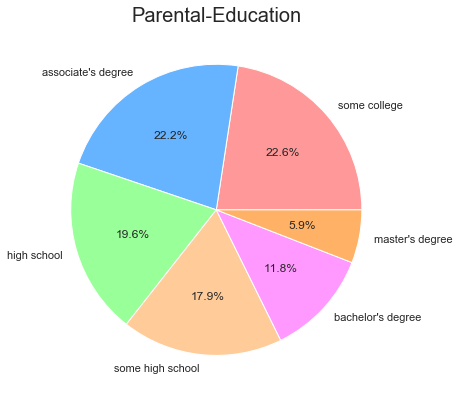

In [39]:
#Plotting pie chart of parental education level
plt.figure(figsize=(30,10))
plt.subplot(141)
plt.axis('off')
plt.title('Parental-Education',fontsize = 20)
df['Parental_education_level'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors)
plt.show()

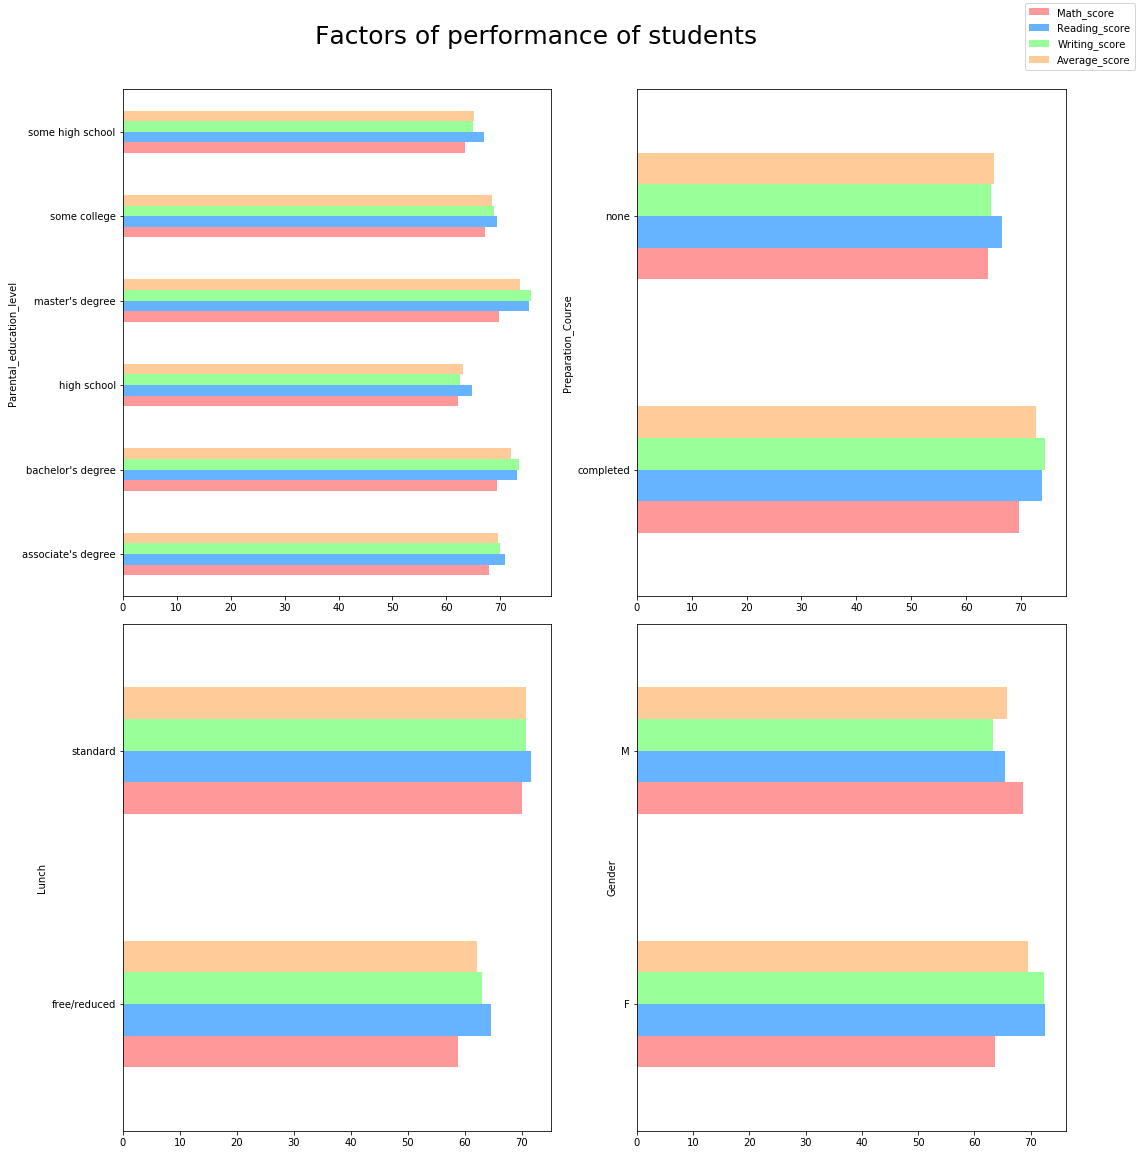

In [17]:
#Plotting horizontal bar chart of factors that affect performance of students
fig = plt.figure(figsize=(15,15))
axes = fig.subplots(nrows=2, ncols=2)
factor_edu.plot(kind = 'barh',ax=axes[0,0],color=colors,legend=False)
factor_pre.plot(kind = 'barh',ax=axes[0,1],color=colors,legend=False)
factor_lunch.plot(kind = 'barh',ax=axes[1,0],color=colors,legend=False)
factor_gender.plot(kind = 'barh',ax=axes[1,1],color=colors,legend=False)

fig.suptitle('Factors of performance of students', y=1.05,fontsize=25)
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'lower center',bbox_to_anchor=(1, 1))
fig.tight_layout() 
plt.show()

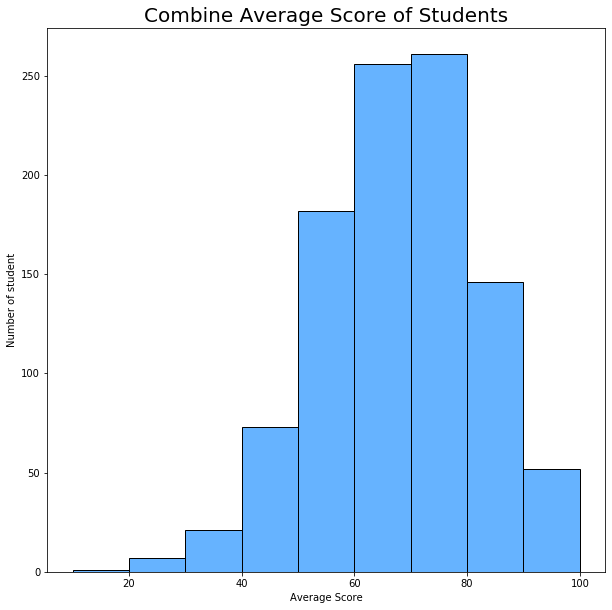

In [18]:
#Plotting histogram of average score of students
plt.figure(figsize=(10,10))
data = df['Average_score']
bins = [10,20,30,40,50,60,70,80,90,100]
plt.hist(data, color = '#66b3ff', edgecolor = 'black',bins=bins)

plt.title('Combine Average Score of Students',fontsize="20")
plt.xlabel('Average Score')
plt.ylabel('Number of student')
plt.show()

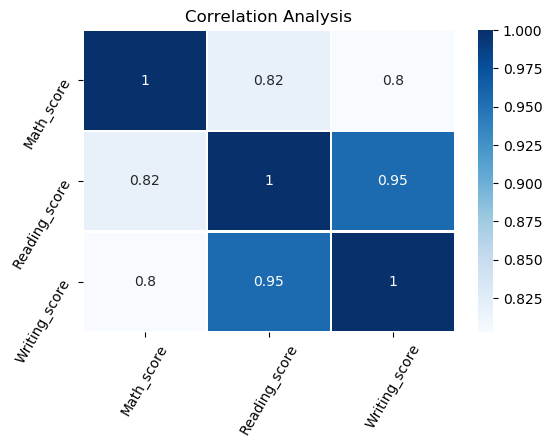

In [19]:
#Plotting heat map of correlation analysis of score of differenct subjects
plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(record.corr(),annot=True,lw=1,linecolor='white',cmap='Blues')
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

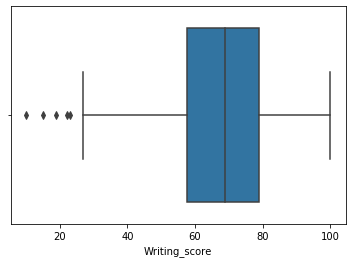

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: Writing_score, dtype: float64

In [20]:
#Plotting boxplot of writing score
sns.boxplot(x='Writing_score',data=record)
plt.show()
df['Writing_score'].describe()

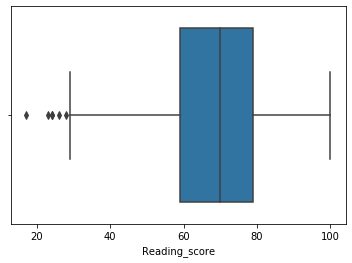

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: Reading_score, dtype: float64

In [21]:
#Plotting boxplot of reading score
sns.boxplot(x='Reading_score',data=record)
plt.show()
df['Reading_score'].describe()

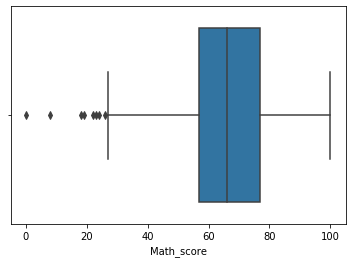

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: Math_score, dtype: float64

In [22]:
#Plotting boxplot of math score
sns.boxplot(x='Math_score',data=record)
plt.show()
df['Math_score'].describe()

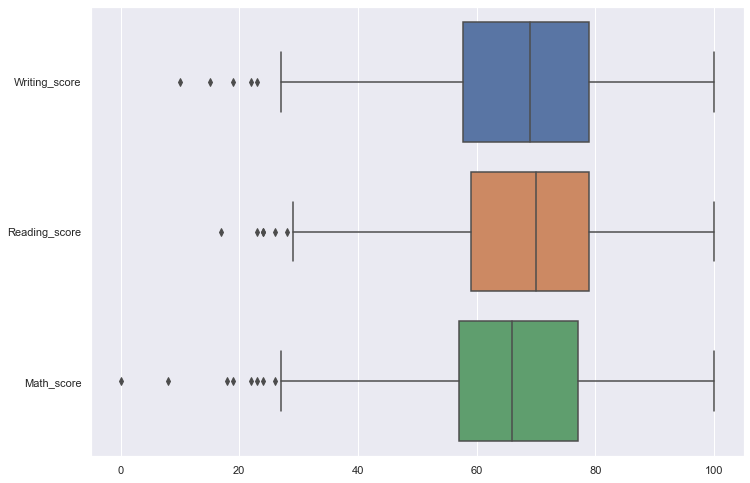

In [23]:
#Plotting boxplot of each subject's score
df1 = df['Writing_score']
df2 = df['Reading_score']
df3 = df['Math_score']

cdf = pd.concat([df1,df2,df3],axis=1)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(orient='h',data=cdf)
plt.show()

### Machine Learning 

In [24]:
x = record.iloc[:, -3:]
x

,Math_score,Reading_score,Writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [25]:
y = record.iloc[:, 3:4]
y

,Lunch
0,standard
1,standard
2,standard
3,free/reduced
4,standard
...,...
995,standard
996,free/reduced
997,free/reduced
998,standard


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)  # training and transforming from x_train
X_test = sc.transform(x_test)    # only transforming from x_test

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

C:\Users\MR.COOL\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = log_reg.predict(X_test)
y_pred

array(['standard', 'standard', 'free/reduced', 'standard', 'standard',
       'standard', 'standard', 'free/reduced', 'standard', 'standard',
       'standard', 'free/reduced', 'standard', 'standard', 'free/reduced',
       'free/reduced', 'standard', 'standard', 'standard', 'standard',
       'standard', 'free/reduced', 'standard', 'standard', 'standard',
       'standard', 'standard', 'standard', 'free/reduced', 'standard',
       'standard', 'standard', 'standard', 'free/reduced', 'free/reduced',
       'standard', 'standard', 'standard', 'standard', 'standard',
       'standard', 'standard', 'standard', 'free/reduced', 'standard',
       'standard', 'standard', 'standard', 'standard', 'free/reduced',
       'free/reduced', 'standard', 'free/reduced', 'standard',
       'free/reduced', 'standard', 'free/reduced', 'standard', 'standard',
       'standard', 'standard', 'standard', 'free/reduced', 'standard',
       'standard', 'standard', 'standard', 'free/reduced', 'standard',
      

In [30]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(42, 81, 17, 190)

In [31]:
accuracy = (tn+tp)/len(y_test)
accuracy

0.703030303030303

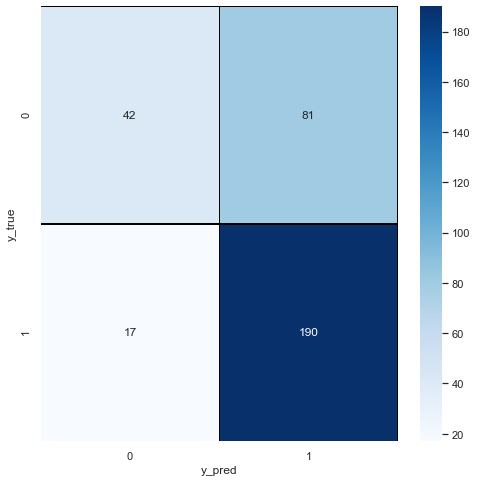

In [32]:
#Plotting heat map to show result of confusion matrix
f, ax = plt.subplots(figsize =(8,8))
sns.heatmap(result,annot = True,linewidths=0.5,linecolor="black",fmt = ".0f",ax=ax,cmap='Blues')
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()